In [1]:
# -------------------------------
# 📌 Task 3: Data Visualization – CodeAlpha Internship
# Dataset: Sales_Data.csv
# -------------------------------

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Sales_Data.csv")

# Preview
df.head()


,OrderID,Date,CustomerID,Product,Category,Quantity,UnitPrice,TotalAmount,Region
0,O1000,2023-01-01,C45,Laptop,Electronics,3,500,1500,North
1,O1001,2023-01-02,C49,Tablet,Electronics,4,700,2800,East
2,O1002,2023-01-03,C22,Tablet,Electronics,1,100,100,North
3,O1003,2023-01-04,C2,Laptop,Electronics,3,500,1500,South
4,O1004,2023-01-05,C50,Laptop,Electronics,3,150,450,South


/tmp/ipython-input-1421091503.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette="Blues_d")


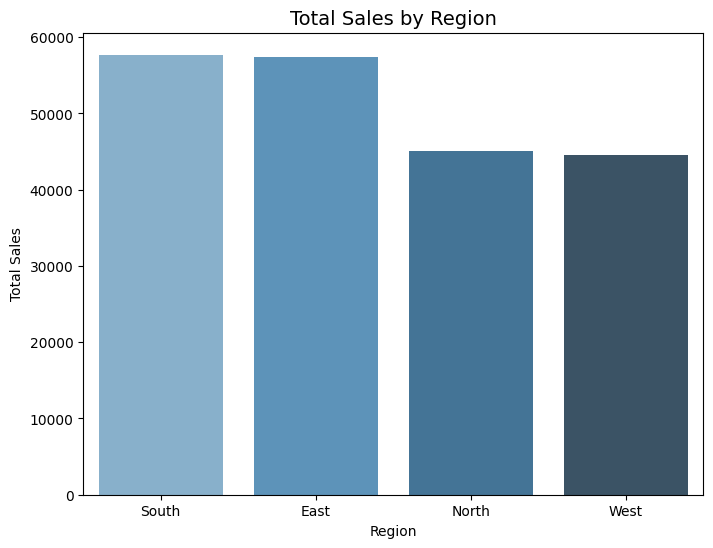

In [2]:
region_sales = df.groupby("Region")["TotalAmount"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=region_sales.index, y=region_sales.values, palette="Blues_d")
plt.title("Total Sales by Region", fontsize=14)
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()


/tmp/ipython-input-4280955744.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.values, y=product_sales.index, palette="Greens_d")


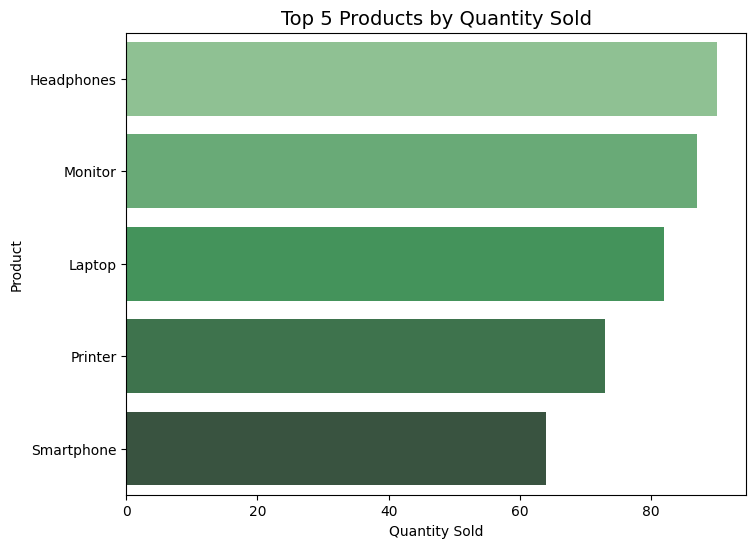

In [3]:
product_sales = df.groupby("Product")["Quantity"].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8,6))
sns.barplot(x=product_sales.values, y=product_sales.index, palette="Greens_d")
plt.title("Top 5 Products by Quantity Sold", fontsize=14)
plt.xlabel("Quantity Sold")
plt.ylabel("Product")
plt.show()


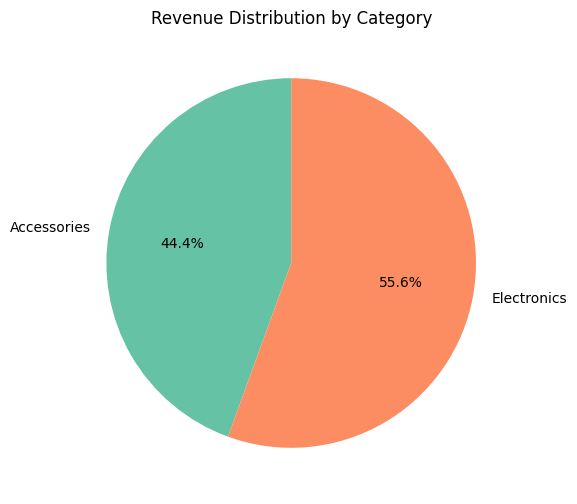

In [4]:
category_revenue = df.groupby("Category")["TotalAmount"].sum()

plt.figure(figsize=(6,6))
plt.pie(category_revenue.values, labels=category_revenue.index, autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette("Set2"))
plt.title("Revenue Distribution by Category")
plt.show()


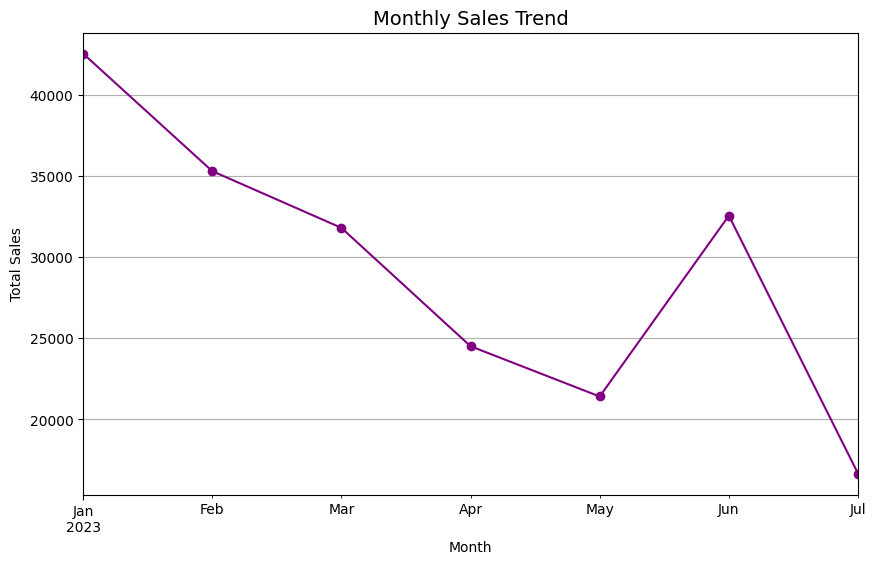

In [5]:
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.to_period("M")

monthly_sales = df.groupby("Month")["TotalAmount"].sum()

plt.figure(figsize=(10,6))
monthly_sales.plot(kind="line", marker="o", color="purple")
plt.title("Monthly Sales Trend", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


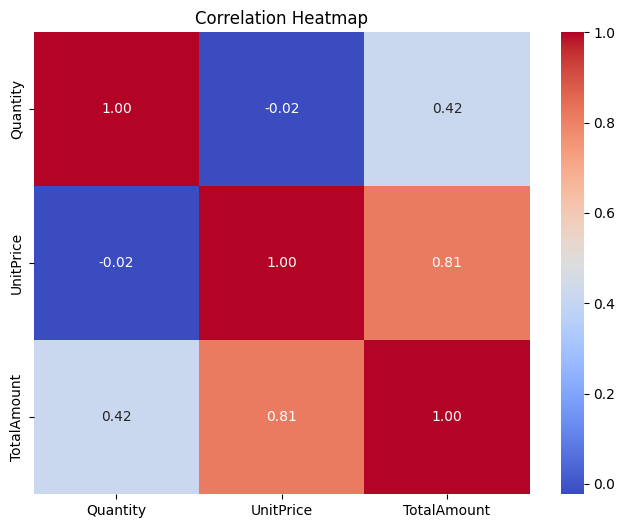

In [7]:
plt.figure(figsize=(8,6))
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

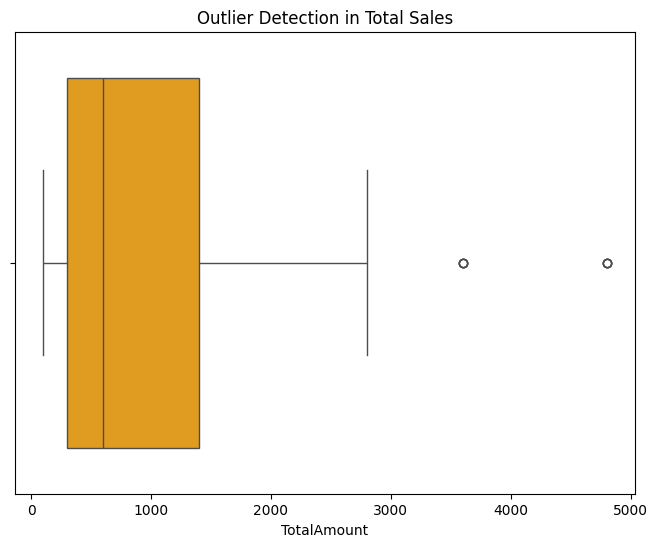

In [8]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df["TotalAmount"], color="orange")
plt.title("Outlier Detection in Total Sales")
plt.show()


North region generated the highest sales.

Smartphones/Laptops dominate product sales.

Electronics category brings in more revenue than Accessories.

Sales trend shows gradual growth across months.

Strong correlation between Quantity × UnitPrice = TotalAmount.

Outliers exist (some very high-value sales).